In [8]:
## Packages
library(dplyr)
library(stringr)
library(broom)
library(ggplot2)
library(tidyr)
library(gender)
library(stringr)



In [9]:
## Data

CD_results_long <- read.csv("flipped_house_2018_long.csv")

CD_results_wide <- read.csv("flipped_house_2018_wide.csv")


# Add region
states_northeast <- c("CT", "ME", "MA", "NH", "NJ", "NY", "PA", "RI", "VT")
states_west <- c("AK", "AZ", "CA", "CO", "HI", "ID", "NV", "NM", "OR", "WA", "WY")
states_midwest <- c("IN", "IL", "IA", "KN", "MI", "MN", "MO", "NB", "ND", "OH", "SD", "WI")
states_south <- c("AL", "AK", "DE", "DC", "FL", "GA", "KY", "LA", "MD", "MI", "NC", "OK", "SC", "TN", "TX", "VA", "WV")


# Replace "dataset" with name of your dataset
CD_results_long <- CD_results_long %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))


head(CD_results_long)

head(CD_results_wide)


,X,state,district,candidate,gender,total_votes,vote_share,winner_party,winner_gender,pres_winner,flip,year,party,region
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<chr>
1,1,AK,0,Alyse S. Galvin,female,131199,0.4649710,Republican,male,Trump,FALSE,2018,Democrat,West
2,2,AL,1,Robert Kennedy Jr.,male,89226,0.3677648,Republican,male,Trump,FALSE,2018,Democrat,South
3,3,AL,2,Tabitha Isner,female,86931,0.3842594,Republican,female,Trump,FALSE,2018,Democrat,South
4,4,AL,3,Mallory Hagan,female,83996,0.3621844,Republican,male,Trump,FALSE,2018,Democrat,South
5,5,AL,4,Lee Auman,male,46492,0.2012911,Republican,male,Trump,FALSE,2018,Democrat,South
6,6,AL,6,Danner Kline,male,85644,0.3077089,Republican,male,Trump,FALSE,2018,Democrat,South


,X,state,district,candidate_democrat,candidate_republican,total_votes_democrat,total_votes_republican,vote_share_dem,vote_share_rep,winner_party,year,gender_dem,gender_rep,winner_gender,pres_winner,flip
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,1,AK,0,Alyse S. Galvin,Don Young,131199,149779,0.4649710,0.5308187,Republican,2018,female,male,male,Trump,FALSE
2,2,AL,1,Robert Kennedy Jr.,Bradley Byrne,89226,153228,0.3677648,0.6315633,Republican,2018,male,male,male,Trump,FALSE
3,3,AL,2,Tabitha Isner,Martha Roby,86931,138879,0.3842594,0.6138841,Republican,2018,female,female,female,Trump,FALSE
4,4,AL,3,Mallory Hagan,Mike Rogers,83996,147770,0.3621844,0.6371731,Republican,2018,female,male,male,Trump,FALSE
5,5,AL,4,Lee Auman,Robert Aderholt,46492,184255,0.2012911,0.7977477,Republican,2018,male,male,male,Trump,FALSE
6,6,AL,6,Danner Kline,Gary Palmer,85644,192542,0.3077089,0.6917809,Republican,2018,male,male,male,Trump,FALSE


In [21]:
## Flipped districts
# Fill gender for unknowns, only 5
CD_results_long %>%
    filter(flip == TRUE, gender == "Unknown")

CD_results_long[310,"gender"] <- "male"
CD_results_long[310,"winner_gender"] <- "male"
CD_results_long[311,"gender"] <- "female"
CD_results_long[311,"winner_gender"] <- "female"
CD_results_long[716,"gender"] <- "male"
CD_results_long[720,"gender"] <- "male"
CD_results_long[720,"winner_gender"] <- "female"
CD_results_long[721,"gender"] <- "female"


CD_results_long %>%
    filter(party == "Democrat", flip == TRUE) %>%
    group_by(gender) %>%
    summarize(count = n())

CD_results_long %>%
    filter(party == "Republican", flip == TRUE) %>%
    group_by(gender) %>%
    summarize(count = n())



X,state,district,candidate,gender,total_votes,vote_share,winner_party,winner_gender,pres_winner,flip,year,party,region
<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<chr>


`summarise()` ungrouping output (override with `.groups` argument)



gender,count
<chr>,<int>
female,14
male,22


`summarise()` ungrouping output (override with `.groups` argument)



gender,count
<chr>,<int>
female,8
male,26
N/A,2


X,state,district,candidate,gender,total_votes,vote_share,winner_party,winner_gender,pres_winner,flip,year,party,region
<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<chr>
642,NJ,4,No candidate,N/A,0,NA,Democrat,male,Trump,TRUE,2018,Republican,Northeast
717,PA,18,No candidate,N/A,0,NA,Democrat,male,Trump,TRUE,2018,Republican,Northeast


`summarise()` regrouping output by 'flip' (override with `.groups` argument)



flip,gender,count
<lgl>,<chr>,<int>
FALSE,female,148
FALSE,male,195
TRUE,female,14
TRUE,male,22


`summarise()` ungrouping output (override with `.groups` argument)



gender,count,prop
<chr>,<int>,<dbl>
female,162,0.4274406
male,217,0.5725594


`summarise()` ungrouping output (override with `.groups` argument)



candidate,gender,vote_share
<chr>,<chr>,<dbl>
Tom O'Halleran,male,0.5383161
Lucy McBath,female,0.5051194
Abby Finkenauer,female,0.5096352
Dave Loebsack,male,0.5479031
Cindy Axne,female,0.4930426
Lauren Underwood,female,0.5250186
Cheri Bustos,female,0.6209341
Jared F. Golden,male,0.5062355
Haley Stevens,female,0.5184140


`summarise()` regrouping output by 'flip' (override with `.groups` argument)



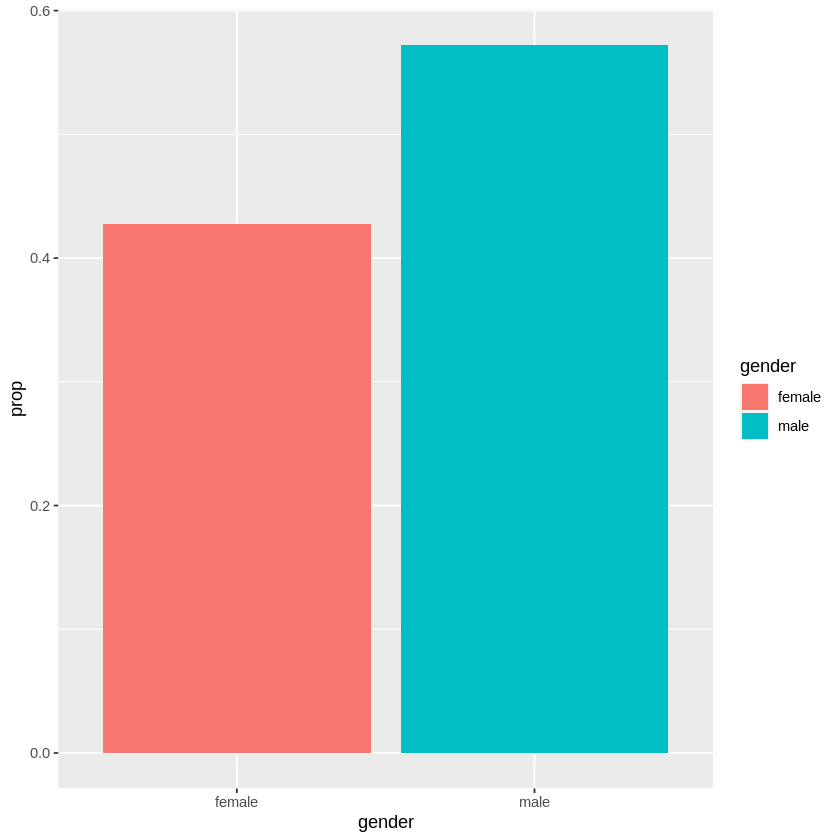

`summarise()` regrouping output by 'flip' (override with `.groups` argument)



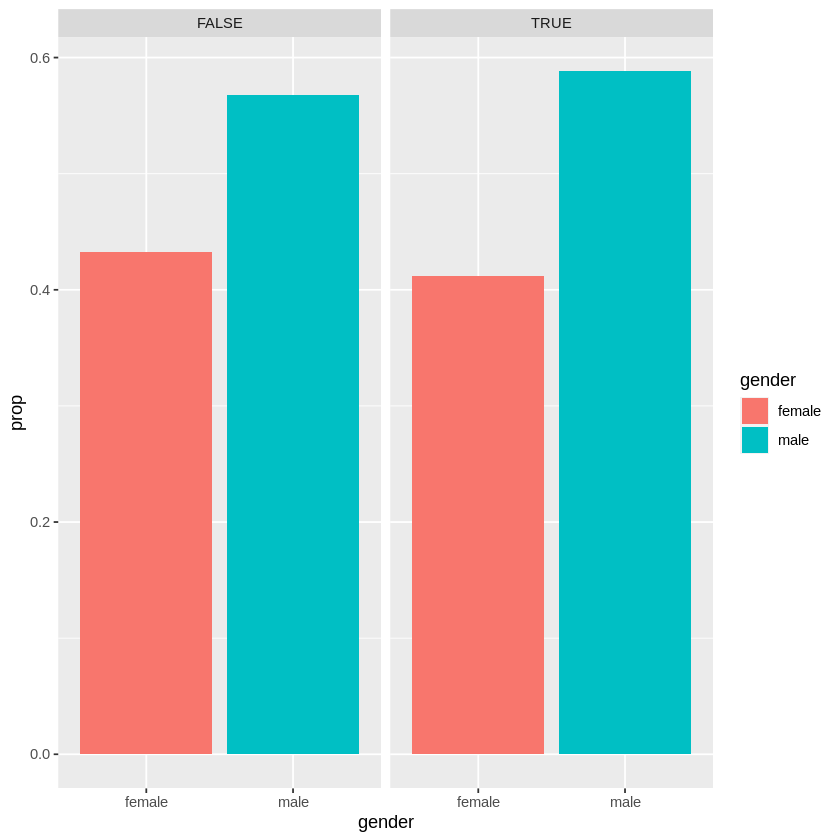

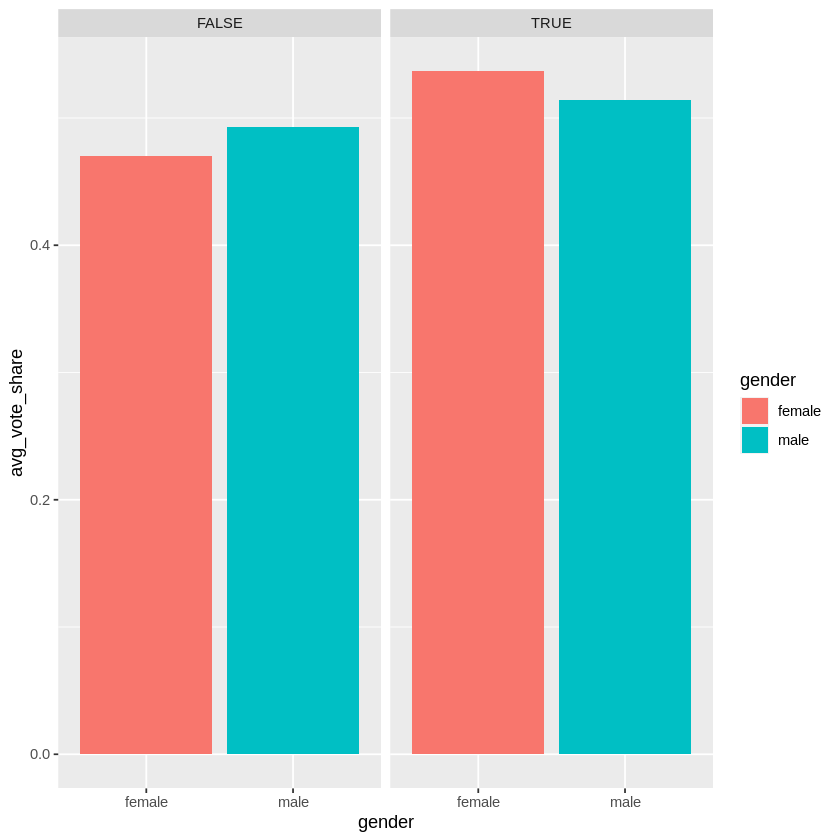

In [51]:
## Visuals
CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female")) %>%
    group_by(flip, gender) %>%
    summarize(count = n())

CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female")) %>%
    group_by(gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count / sum(count))


CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female")) %>%
    group_by(gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count / sum(count)) %>%
    ggplot(aes(x = gender, y = prop, fill = gender)) + 
        geom_bar(stat = "identity")


CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female"), vote_share < 0.75) %>%
    group_by(flip, gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count / sum(count)) %>%
    ggplot(aes(x = gender, y = prop, fill = gender)) + 
        geom_bar(stat = "identity") + 
        facet_grid(. ~ flip)

CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female"), vote_share <0.75) %>%
    group_by(flip, gender) %>%
    summarize(avg_vote_share = mean(vote_share)) %>%
    ggplot(aes(x = gender, y = avg_vote_share, fill = gender)) + 
    geom_bar(stat = "identity") + 
    facet_grid(. ~ flip)
# Kind of interesting that there are more males than females in the flipped district winners but females had a higher vote share on average




In [53]:
## Linear regression
# Logistic regression, binomial outcome
model1 <- CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female")) %>%
    glm(flip ~ gender, data = ., family = "binomial")

tidy(model1)


model2 <- CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female"), pres_winner == "Trump") %>%
    glm(flip ~ gender + vote_share + region, data = ., family = "binomial")

tidy(model2)

# Basic takeaway is that there is no effect, possible that lack of controls and small sample size makes it difficult to detect


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-2.3581549,0.2796164,-8.433537,3.353719e-17
gendermale,0.1761978,0.3588427,0.491017,6.234144e-01


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-51.2690591,12.499003,-4.1018518,4.098568e-05
gendermale,-0.3480931,1.054254,-0.3301795,7.412643e-01
vote_share,104.1160283,25.263062,4.1212751,3.767811e-05
regionNortheast,4.8180660,1.781601,2.7043459,6.843900e-03
regionOther,-0.3338241,1.661662,-0.2008977,8.407785e-01
regionSouth,-0.4390017,1.168490,-0.3756999,7.071400e-01
regionWest,-0.5229404,1.596504,-0.3275534,7.432493e-01
